In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
# !pip install -U -q kaggle
# !mkdir -p ~/.kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !kaggle datasets list

In [ ]:
# !kaggle datasets download -d moltean/fruits -p /content/gdrive/MyDrive/datasets

In [ ]:
# !unzip /content/gdrive/MyDrive/datasets/fruits.zip -d /content/gdrive/MyDrive/datasets/fruits

In [ ]:
from fastbook import *

In [ ]:
from fastai.vision.all import *

In [ ]:
path =  Path('/content/gdrive/MyDrive/datasets/fruits/fruits-360')
Path.BASE_PATH = path

In [ ]:
fns = get_image_files(path)
fns

(#54633) [Path('Test/Apple Braeburn/322_100.jpg'),Path('Test/Apple Braeburn/323_100.jpg'),Path('Test/Apple Braeburn/321_100.jpg'),Path('Test/Apple Braeburn/64_100.jpg'),Path('Test/Apple Braeburn/55_100.jpg'),Path('Test/Apple Braeburn/56_100.jpg'),Path('Test/Apple Braeburn/43_100.jpg'),Path('Test/Apple Braeburn/42_100.jpg'),Path('Test/Apple Braeburn/324_100.jpg'),Path('Test/Apple Braeburn/41_100.jpg')...]

In [ ]:
(path/'Training/Corn').ls()

(#450) [Path('Training/Corn/r_121_100.jpg'),Path('Training/Corn/43_100.jpg'),Path('Training/Corn/r_98_100.jpg'),Path('Training/Corn/r_99_100.jpg'),Path('Training/Corn/r2_127_100.jpg'),Path('Training/Corn/r_194_100.jpg'),Path('Training/Corn/198_100.jpg'),Path('Training/Corn/r_89_100.jpg'),Path('Training/Corn/115_100.jpg'),Path('Training/Corn/r_116_100.jpg')...]

In [ ]:
fruits = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSubsetSplitter(0.2, 0.05),
    get_y = parent_label,
    batch_tfms=aug_transforms(min_scale=0.75)
)
dsets = fruits.datasets(path/'Training')
dls = fruits.dataloaders(path/'Training')

In [ ]:
dsets.train, dsets.valid

((#6389) [(PILImage mode=RGB size=100x100, TensorCategory(16)),(PILImage mode=RGB size=100x100, TensorCategory(36)),(PILImage mode=RGB size=100x100, TensorCategory(16)),(PILImage mode=RGB size=100x100, TensorCategory(8)),(PILImage mode=RGB size=100x100, TensorCategory(1)),(PILImage mode=RGB size=100x100, TensorCategory(53)),(PILImage mode=RGB size=100x100, TensorCategory(61)),(PILImage mode=RGB size=100x100, TensorCategory(23)),(PILImage mode=RGB size=100x100, TensorCategory(27)),(PILImage mode=RGB size=100x100, TensorCategory(4))...],
 (#1597) [(PILImage mode=RGB size=100x100, TensorCategory(45)),(PILImage mode=RGB size=100x100, TensorCategory(38)),(PILImage mode=RGB size=100x100, TensorCategory(43)),(PILImage mode=RGB size=100x100, TensorCategory(0)),(PILImage mode=RGB size=100x100, TensorCategory(40)),(PILImage mode=RGB size=100x100, TensorCategory(58)),(PILImage mode=RGB size=100x100, TensorCategory(13)),(PILImage mode=RGB size=100x100, TensorCategory(5)),(PILImage mode=RGB size=10

In [ ]:
len(dsets.vocab)

65

In [ ]:
dsets.vocab

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Passion Fruit']

In [ ]:
fruits.summary(path/'Training')

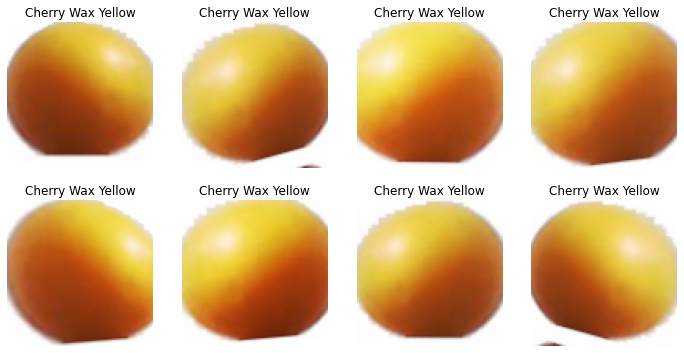

In [ ]:
dls.train.show_batch(max_n=8, nrows=2, unique=True)


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.774145,3.186733,0.759549,28:21


epoch,train_loss,valid_loss,error_rate,time
0,0.217309,2.702338,0.703193,00:38
1,0.080249,2.580924,0.646212,00:38


In [ ]:
learn.export('/content/gdrive/MyDrive/fruits1.1.pkl')

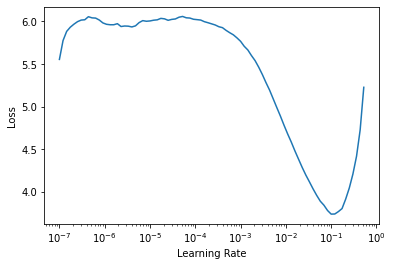

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.468588,3.046059,0.753287,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.184462,2.315436,0.571697,00:38
1,0.065565,2.507273,0.598622,00:39


In [ ]:
learn.export('/content/gdrive/MyDrive/fruits2.1_lrfind.pkl')

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.111835,3.284667,0.746400,00:32
1,0.236062,3.607470,0.779587,00:32
2,0.083892,3.905233,0.821540,00:32


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,4.354039,3.225067,0.769634,00:04
1,2.474658,2.997909,0.691099,00:05
2,1.656888,3.375137,0.759162,00:04


In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=1.3182566908653825e-05, lr_steep=6.309573450380412e-07)

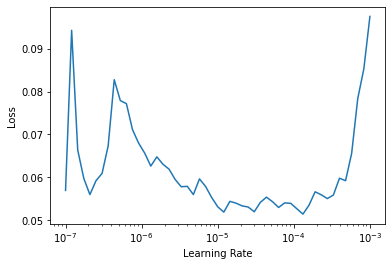

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(8, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.057395,3.569139,0.777708,00:38
1,0.047022,3.747011,0.800877,00:38
2,0.034246,3.717917,0.793989,00:39
3,0.030652,3.706960,0.795867,00:38
4,0.024697,3.572780,0.780213,00:38
5,0.021667,3.547650,0.778334,00:38
6,0.022241,3.536918,0.778334,00:39
7,0.023656,3.471736,0.775830,00:38


In [ ]:
learn.export('/content/gdrive/MyDrive/fruits3.1_customFine_lrfind.pkl')

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.111505,3.236605,0.765185,00:32
1,0.252511,2.728150,0.658735,00:32
2,0.093195,2.755093,0.689418,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.048890,2.779140,0.680025,00:38
1,0.042558,2.557425,0.627426,00:39
2,0.038233,2.761672,0.688165,00:39
3,0.031504,2.694069,0.656857,00:38
4,0.026421,2.651292,0.624296,00:39
5,0.019396,2.613288,0.634941,00:39
6,0.020054,2.578101,0.650595,00:38
7,0.015218,2.748014,0.677520,00:39
8,0.012947,2.811267,0.691296,00:38
9,0.017046,2.551723,0.619286,00:39


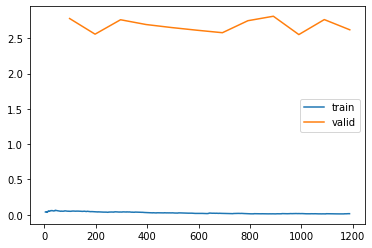

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.export('/content/gdrive/MyDrive/fruits4.1_customFine_dlr.pkl')

In [ ]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,5.034304,3.795814,0.921466,00:06
1,3.158462,3.273419,0.748691,00:06
2,2.004870,3.467837,0.753927,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.366685,3.108721,0.727749,00:07
1,0.296463,3.036963,0.706806,00:07
2,0.255847,2.845745,0.696335,00:08
3,0.213280,2.721012,0.706806,00:08
4,0.173636,2.710952,0.722513,00:07
5,0.146414,2.669027,0.706806,00:07


In [ ]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,1.665449,3.184393,0.730745,00:41
1,0.455257,3.189682,0.713212,00:41
2,0.198969,2.960726,0.673763,00:40


epoch,train_loss,valid_loss,error_rate,time
0,0.080770,2.658022,0.664997,00:52
1,0.088888,2.261575,0.592361,00:52
2,0.072479,2.247152,0.556669,00:52
3,0.032472,2.194719,0.561678,00:52
4,0.011056,2.222446,0.579211,00:52
5,0.005253,2.168638,0.561678,00:51


In [ ]:
learn.export('/content/gdrive/MyDrive/fruits5.1_resnet50.pkl')

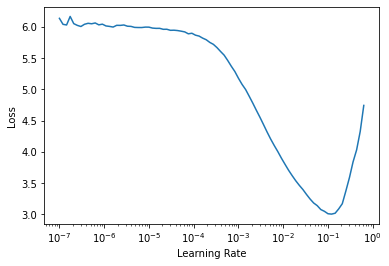

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
lr_min,lr_steep = learn.lr_find()

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,3.567854,3.536127,0.759162,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.739555,3.300924,0.712042,00:07
1,0.556228,3.470998,0.795812,00:07


In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fit_one_cycle(3,3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,3.179009,2.703884,0.685864,00:06
1,1.667906,3.144942,0.706806,00:06
2,1.080000,3.200850,0.717277,00:06


In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=3.311311302240938e-05, lr_steep=6.309573450380412e-07)

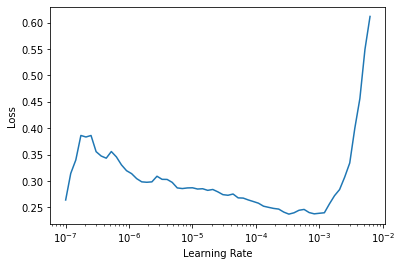

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.295256,3.205923,0.722513,00:08
1,0.266866,3.186448,0.732984,00:07
2,0.248729,3.175332,0.717277,00:08
3,0.213974,3.204639,0.722513,00:08
4,0.204550,3.166912,0.717277,00:08
5,0.200051,3.216602,0.732984,00:07


In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,3.236925,3.161177,0.732984,00:06
1,1.692022,3.248444,0.732984,00:06
2,1.068454,3.457500,0.759162,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.243485,3.437908,0.753927,00:07
1,0.223438,3.399456,0.759162,00:08
2,0.219089,3.403931,0.774869,00:07
3,0.206620,3.324063,0.738220,00:07
4,0.196084,3.359500,0.759162,00:07
5,0.184238,3.346381,0.743455,00:07
6,0.170202,3.282265,0.738220,00:07
7,0.151811,3.243145,0.717277,00:08
8,0.142680,3.222697,0.732984,00:08
9,0.131180,3.251819,0.743455,00:08


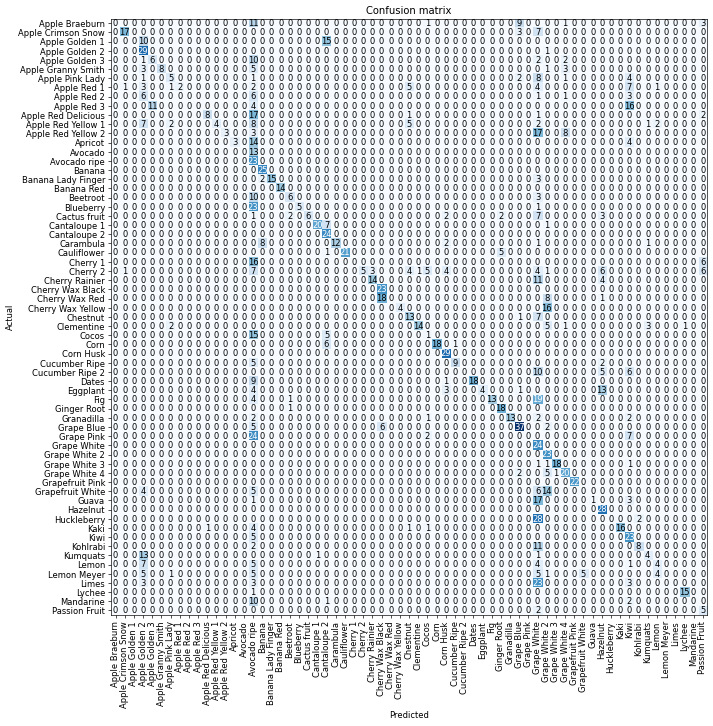

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('Huckleberry', 'Grape White', 28),
 ('Grape Pink', 'Avocado ripe', 24),
 ('Blueberry', 'Avocado ripe', 23),
 ('Limes', 'Grape White', 23),
 ('Fig', 'Grape White', 19),
 ('Cherry Wax Red', 'Cherry Wax Black', 18),
 ('Apple Red Delicious', 'Avocado ripe', 17),
 ('Apple Red Yellow 2', 'Grape White', 17),
 ('Guava', 'Grape White', 17),
 ('Apple Red 3', 'Kiwi', 16),
 ('Cherry 1', 'Avocado ripe', 16),
 ('Cherry Wax Yellow', 'Grape White 2', 16),
 ('Apple Golden 1', 'Cantaloupe 2', 15),
 ('Cocos', 'Avocado ripe', 15),
 ('Apricot', 'Avocado ripe', 14),
 ('Grapefruit White', 'Grape White 2', 14),
 ('Avocado', 'Avocado ripe', 13),
 ('Eggplant', 'Hazelnut', 13),
 ('Kumquats', 'Apple Golden 2', 13),
 ('Apple Braeburn', 'Avocado ripe', 11),
 ('Apple Red 3', 'Apple Golden 3', 11),
 ('Cherry Rainier', 'Grape White', 11),
 ('Kohlrabi', 'Grape White', 11),
 ('Apple Golden 1', 'Apple Golden 2', 10),
 ('Apple Golden 3', 'Avocado ripe', 10),
 ('Beetroot', 'Avocado ripe', 10),
 ('Cucumber Ripe 2', 'Grape

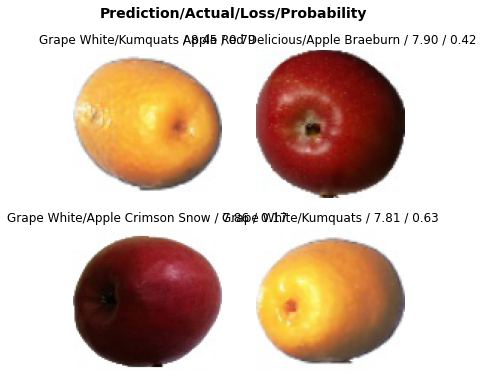

In [ ]:
interp.plot_top_losses(4, nrows=2)